In [1]:
import datetime
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:.5f}'.format
pd.set_option("display.max_colwidth", 0)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
import warnings
warnings.filterwarnings("ignore")

In [2]:
%%time
df_localness = pd.read_csv('./data/food_localness_oct.csv',header=0) #,nrows=10

CPU times: user 14.5 s, sys: 3.89 s, total: 18.4 s
Wall time: 35.4 s


In [3]:
def compute_entropy_function(x):
    x = x.reset_index()
    total_cuisines = x.main_cuisine.unique().shape[0]  # individual based entropy, entropy according to all orders placed by one person
    if total_cuisines == 1:
        return 0
    sum_nominator = 0
    for prop in x['consistency'].tolist(): # each element is a proportion of one cuisine
        sum_nominator += prop*(np.log(1/prop))
    entropy = sum_nominator/np.log(total_cuisines)
    return entropy

In [6]:
%%time
# ~27min
df_localness['consistency'] = 1
groupped_data = df_localness.groupby(['account_id','main_cuisine']).agg({'consistency': 'sum'})
print(groupped_data.shape[0])

print(datetime.datetime.now(),'Compute proportions...')
groupped_data = groupped_data.groupby(level=0).apply(lambda x:  x / x.sum()) # convert to proportions
print(datetime.datetime.now(),'Done computing proportions!')

print(datetime.datetime.now(),'Compute entropy...')
groupped_data_entropy = groupped_data.groupby('account_id').apply(compute_entropy_function).reset_index() # compute entropy
print(datetime.datetime.now(),'Done computing entropy!')

1423371
2024-06-05 09:00:57.047391 Compute proportions...
2024-06-05 09:12:13.899189 Done computing proportions!
2024-06-05 09:12:13.900267 Compute entropy...
2024-06-05 09:25:31.546224 Done computing entropy!
CPU times: user 13min 41s, sys: 2.61 s, total: 13min 43s
Wall time: 24min 36s


<Axes: >

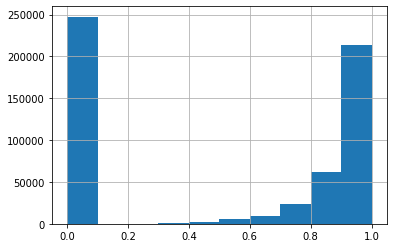

In [7]:
groupped_data_entropy.columns = ['account_id', 'consistency']
groupped_data_entropy.consistency.hist()
# Two peaks: either very consistent (0) or very inconsistent (1)

In [8]:
groupped_data_entropy.head(2)

,account_id,consistency
0,1008,1.00000
1,4626,0.76372


In [9]:
groupped_data_entropy.to_csv('./data/order_consistency_oct.csv',index=False)